In [1]:
from basic_pitch.inference import predict
import pretty_midi
from basic_pitch import ICASSP_2022_MODEL_PATH
from IPython.display import Audio

In [2]:
model_output, midi_data, note_events = predict("data/forest.m4a")


Predicting MIDI for data/forest.m4a...


C:\Users\user\.virtualenvs\KIDS\lib\site-packages\basic_pitch\inference.py:89: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_original, _ = librosa.load(str(audio_path), sr=AUDIO_SAMPLE_RATE, mono=True)
C:\Users\user\.virtualenvs\KIDS\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [3]:
def midi_to_notes(midi_data) -> list[pretty_midi.Note]:
    notes = []
    beats_per_second = midi_data.estimate_tempo() / 60
    avg_note_time = 1 / beats_per_second
    print(avg_note_time)
    for instrument in midi_data.instruments:
        for i, note in enumerate(instrument.notes):
            note_time = note.end - note.start
            if note_time / avg_note_time < 0.1 \
                    and i > 0:
                print(note_time / avg_note_time)

                print(note.pitch)
                if note.pitch == instrument.notes[i - 1].pitch:
                    instrument.notes[i - 1].end = note.end
                    continue

            notes.append(note)
            last_note = note

    return notes

In [138]:
midi_data = pretty_midi.PrettyMIDI("path_to_new_midi_file.mid")
notes = midi_to_notes(midi_data)
notes


0.4008522727272726


[Note(start=0.661364, end=1.090909, pitch=60, velocity=93),
 Note(start=1.102273, end=1.509091, pitch=69, velocity=95),
 Note(start=1.509091, end=1.893182, pitch=69, velocity=93),
 Note(start=1.904545, end=2.240909, pitch=67, velocity=86),
 Note(start=2.288636, end=2.684091, pitch=69, velocity=89),
 Note(start=2.684091, end=3.065909, pitch=65, velocity=89),
 Note(start=3.102273, end=3.506818, pitch=60, velocity=91),
 Note(start=3.506818, end=3.913636, pitch=60, velocity=94),
 Note(start=3.913636, end=4.286364, pitch=60, velocity=89),
 Note(start=4.309091, end=5.100000, pitch=69, velocity=95),
 Note(start=4.854545, end=5.100000, pitch=69, velocity=84),
 Note(start=5.134091, end=5.493182, pitch=70, velocity=91),
 Note(start=5.506818, end=5.865909, pitch=74, velocity=88),
 Note(start=5.959091, end=6.877273, pitch=72, velocity=94),
 Note(start=6.761364, end=6.947727, pitch=67, velocity=54),
 Note(start=7.038636, end=7.445455, pitch=72, velocity=92),
 Note(start=7.468182, end=7.875000, pitc

In [139]:
import numpy as np
from bokeh.layouts import layout
from bokeh.models import Div
from bokeh.plotting import figure, show

# create a plot demonstrating a sine wave
p1 = figure(height=300)

p1.xaxis.fixed_location = 0

# create a plot demonstrating a cosine wave
p2 = figure(height=300)

for note in notes:
    p1.line((note.start, note.end), note.pitch, line_width=7, line_color="darkgreen")

for i, note in enumerate(notes):
    if i % 3 == 0:
        p2.line((note.start, note.end), note.pitch + i % 6 + 1, line_width=7, line_color="red")
        continue
    p2.line((note.start, note.end), note.pitch, line_width=7, line_color="darkgreen")

p2.xaxis.fixed_location = 0

# define the layout
layout = layout(
    [
        p1,
        p2,
    ],
    sizing_mode="stretch_width",
)

show(layout)

In [6]:
for note in notes:
    time = note.end - note.start
    print(f"start: {note.start} end: {note.end}")
    print(pretty_midi.note_number_to_name(note.pitch), note.pitch)
    print("-" * 15)

start: 0.6617687074829932 end: 1.0913378684807256
C4 60
---------------
start: 1.1029478458049886 end: 1.509297052154195
A4 69
---------------
start: 1.509297052154195 end: 1.8924263038548752
A4 69
---------------
start: 1.9040362811791383 end: 2.2420095238095237
G4 67
---------------
start: 2.288449433106576 end: 2.6831886621315193
A4 69
---------------
start: 2.6831886621315193 end: 3.0663179138321994
F4 65
---------------
start: 3.1011478458049884 end: 3.507497052154195
C4 60
---------------
start: 3.507497052154195 end: 3.9138462585034013
C4 60
---------------
start: 3.9138462585034013 end: 4.286649433106576
C4 60
---------------
start: 4.309869387755102 end: 4.855538321995465
A4 69
---------------
start: 4.855538321995465 end: 5.099347845804989
A4 69
---------------
start: 5.1341777777777775 end: 5.494087074829932
A#4 70
---------------
start: 5.505697052154195 end: 5.865606349206349
D5 74
---------------
start: 5.958486167800453 end: 6.876958276643991
C5 72
---------------
start:

In [7]:
note = midi_data.instruments[0].notes[0]
pretty_midi.note_number_to_name(note.pitch)

'C4'

# Music21

In [7]:
import os
from PIL import Image
from music21 import *
from music21.note import Note as Note21

In [8]:
us = environment.UserSettings()
us_path = us.getSettingsPath()
if not os.path.exists(us_path):
    us.create()
print('Path to music21 environment', us_path)
print(us)

Path to music21 environment C:\Users\user\AppData\Roaming\music21-settings.xml
{'directoryScratch': None, 'lilypondPath': 'E:\\AI Talent Hub\\SymphonicMasks\\KIDS\\lilypond', 'lilypondVersion': None, 'lilypondFormat': 'pdf', 'lilypondBackend': 'ps', 'musicxmlPath': 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe', 'midiPath': None, 'graphicsPath': None, 'vectorPath': None, 'pdfPath': None, 'braillePath': None, 'musescoreDirectPNGPath': 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe', 'showFormat': 'musicxml', 'writeFormat': 'musicxml', 'ipythonShowFormat': 'ipython.musicxml.png', 'autoDownload': 'ask', 'debug': '0', 'warnings': '1', 'localCorpusSettings': LocalCorpusSettings([]), 'localCorporaSettings': {}, 'manualCoreCorpusPath': None}


In [9]:
us['musescoreDirectPNGPath'] = r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe'
us['musicxmlPath'] = r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe'

## Midi to score

In [43]:
model_output, midi_data, note_events = predict("data/forest.m4a")

Predicting MIDI for data/forest.m4a...


C:\Users\user\.virtualenvs\KIDS\lib\site-packages\basic_pitch\inference.py:89: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_original, _ = librosa.load(str(audio_path), sr=AUDIO_SAMPLE_RATE, mono=True)
C:\Users\user\.virtualenvs\KIDS\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [51]:
notes = midi_to_notes(midi_data)
tempo = midi_data.estimate_tempo()
notes_in_one_sec = tempo / 60
one_time = round(1 / notes_in_one_sec, 2)

print("tempo:", tempo)
print("a ONE time:", one_time)

m21_notes = []
stream1 = stream.Stream()

start_time = notes[0].start
for _note in notes:
    options = [0.25, 0.5, 1, 2, 3, 4]

    name = pretty_midi.note_number_to_name(_note.pitch)
    note_fraction = (_note.end - _note.start) / one_time

    note_fraction = min(options, key=lambda x: abs(x - note_fraction))
    m21_note = Note21(name, quarterLength=note_fraction)

    m21_notes.append(m21_note)
    stream1.append(m21_note)

0.4008651927437641
tempo: 149.6762529800197
a ONE time: 0.4
1
1
1
1
1
1
1
1
1
1
0.5
1
1
2
0.5
1
1
1
1
1
1
1
1
1
1
1
0.5
1
2
1


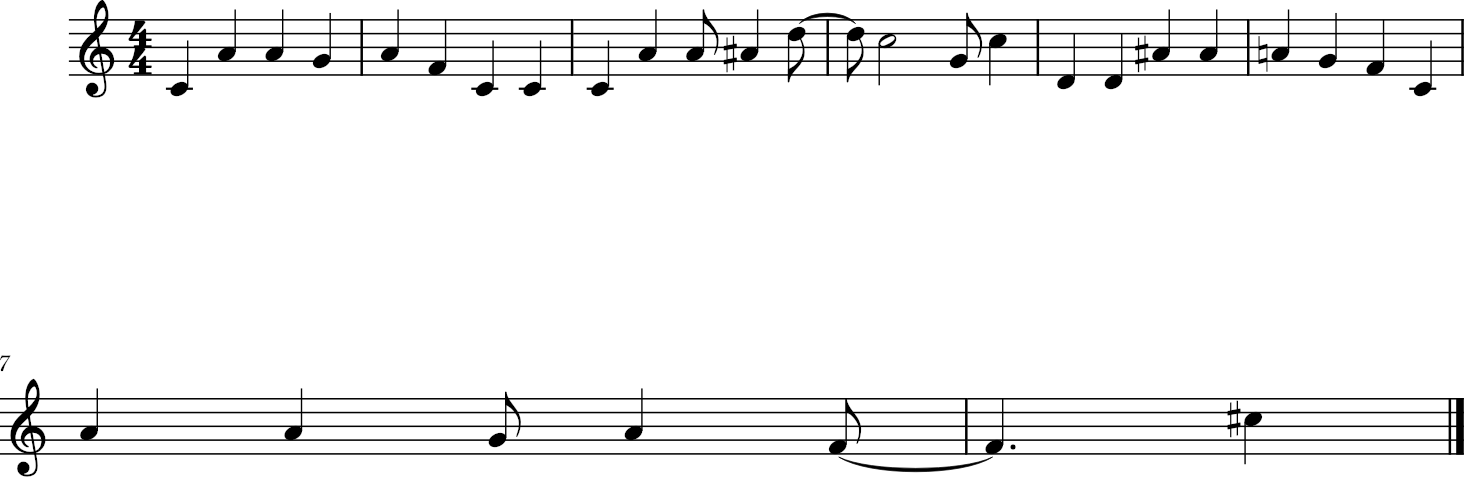

In [52]:
stream1.show()

In [188]:
import pretty_midi

input_midi_file = 'forest.midi'

midi_data = pretty_midi.PrettyMIDI(input_midi_file)

current_tempo = midi_data.estimate_tempo()

print(f"Current Tempo: {current_tempo} BPM")

new_tempo = current_tempo * 60/150

for instrument in midi_data.instruments:
    for note in instrument.notes:
        note.start *= 150//60  # Adjust note start times to reflect the new tempo
        note.end *= 150//60  # Adjust note end times to reflect the new tempo

# Save the modified MIDI file
output_midi_file = 'your_output_file.mid'
midi_data.write(output_midi_file)


Current Tempo: 149.68107725017722 BPM
